In [2]:
# installing pytorch and torchVision
!pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
 # Getting Dataset from kaggle
!kaggle datasets download -d subhaditya/fer2013plus
!unzip fer2013plus.zip -d ./fer2013plus


Streaming output truncated to the last 5000 lines.
  inflating: ./fer2013plus/fer2013plus/fer2013/train/sadness/fer0017536.png  
  inflating: ./fer2013plus/fer2013plus/fer2013/train/sadness/fer0017542.png  
  inflating: ./fer2013plus/fer2013plus/fer2013/train/sadness/fer0017574.png  
  inflating: ./fer2013plus/fer2013plus/fer2013/train/sadness/fer0017577.png  
  inflating: ./fer2013plus/fer2013plus/fer2013/train/sadness/fer0017579.png  
  inflating: ./fer2013plus/fer2013plus/fer2013/train/sadness/fer0017584.png  
  inflating: ./fer2013plus/fer2013plus/fer2013/train/sadness/fer0017610.png  
  inflating: ./fer2013plus/fer2013plus/fer2013/train/sadness/fer0017616.png  
  inflating: ./fer2013plus/fer2013plus/fer2013/train/sadness/fer0017623.png  
  inflating: ./fer2013plus/fer2013plus/fer2013/train/sadness/fer0017633.png  
  inflating: ./fer2013plus/fer2013plus/fer2013/train/sadness/fer0017649.png  
  inflating: ./fer2013plus/fer2013plus/fer2013/train/sadness/fer0017669.png  
  inflating: 

In [4]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [6]:
# Define transformations

transform = transforms.Compose([
    transforms.Resize((128, 128)),         # Resize images to 128x128 pixels
    transforms.Grayscale(),              # Convert images to grayscale
    transforms.ToTensor(),               # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize the tensors
])

In [7]:
# Load the dataset
# datasets.ImageFolder is used to load the data from directories where each class has its own folder.
train_dir = '/content/fer2013plus/fer2013plus/fer2013/train'
test_dir = '/content/fer2013plus/fer2013plus/fer2013/test'
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

In [ ]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 28386
    Root location: /content/fer2013plus/fer2013plus/fer2013/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )

In [ ]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 7099
    Root location: /content/fer2013plus/fer2013plus/fer2013/test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )

In [18]:
# Creating DataLoaders
# Shuffle=True for the training data to ensure the data is randomly shuffled, which helps in better generalization.
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

In [10]:
original_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
num_classes = len(original_dataset.classes)
print(f'Number of classes: {num_classes}')


Number of classes: 8


In [9]:
# Define an optimized CNN model
class OptimizedCNN_Model(nn.Module):
    def __init__(self, num_classes=8):
        super(OptimizedCNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # First convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Second convolutional layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # Third convolutional layer

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(0.5)

        # Adjust input size of fully connected layer based on output of the convolutional layers
        self.fc1 = nn.Linear(128 * 16 * 16, 256)  # First fully connected layer
        self.fc2 = nn.Linear(256, num_classes)  # Output layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Apply conv1, ReLU activation, and max pooling
        x = self.pool(F.relu(self.conv2(x)))  # Apply conv2, ReLU activation, and max pooling
        x = self.pool(F.relu(self.conv3(x)))  # Apply conv3, ReLU activation, and max pooling
        x = x.view(-1, 128 * 16 * 16)         # Flatten the tensor
        x = self.dropout(F.relu(self.fc1(x))) # Apply fc1, ReLU activation, and dropout
        x = self.fc2(x)                       # Apply fc2 to get the output
        return x

model = OptimizedCNN_Model(num_classes=8)


In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/10, Loss: 1.4087
Epoch 2/10, Loss: 1.0901
Epoch 3/10, Loss: 0.9269
Epoch 4/10, Loss: 0.7940
Epoch 5/10, Loss: 0.6641
Epoch 6/10, Loss: 0.5336
Epoch 7/10, Loss: 0.4356
Epoch 8/10, Loss: 0.3471
Epoch 9/10, Loss: 0.2903
Epoch 10/10, Loss: 0.2351


In [ ]:
# Function to evaluate the model's accuracy
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for efficiency
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test dataset: {accuracy:.2f}%')

# Call the function to evaluate the model
evaluate_model(model, test_loader)


Accuracy on the test dataset: 70.16%


In [16]:
# Save the model
torch.save(model.state_dict(), 'optimised_cnn.pth')

In [23]:
# Load the model
model = OptimizedCNN_Model(num_classes=8)
model.load_state_dict(torch.load('optimised_cnn.pth'))
model.eval()  # Set the model to evaluation mode


OptimizedCNN_Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=32768, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=8, bias=True)
)

              precision    recall  f1-score   support

       anger       0.71      0.43      0.53       644
    contempt       0.75      0.18      0.29        51
     disgust       0.83      0.26      0.40        57
        fear       0.74      0.34      0.47       167
   happiness       0.75      0.81      0.78      1827
     neutral       0.69      0.81      0.75      2597
     sadness       0.50      0.39      0.44       856
    surprise       0.79      0.77      0.78       841

    accuracy                           0.70      7040
   macro avg       0.72      0.50      0.55      7040
weighted avg       0.70      0.70      0.69      7040

Accuracy: 70.16%


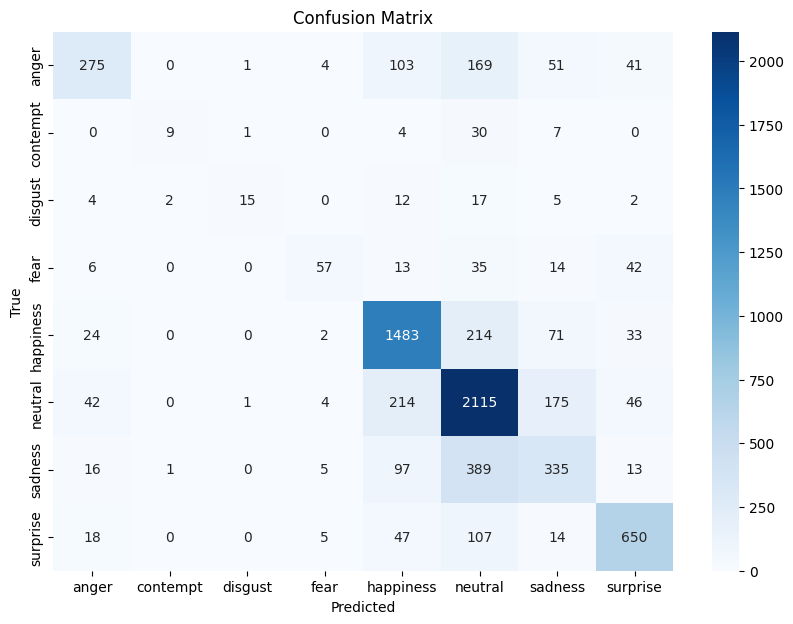

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


class_names = train_dataset.classes

true_labels = []
pred_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        true_labels.extend(labels.numpy())
        pred_labels.extend(preds.numpy())

true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

# Classification report
print(classification_report(true_labels, pred_labels, target_names=class_names))

# Accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **For testing**

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Function to load and preprocess the image
def load_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((128, 128)),       # Resize image to 128x128 pixels
        transforms.Grayscale(),            # Convert image to grayscale
        transforms.ToTensor(),             # Convert image to tensor
        transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize tensor
    ])
    image = Image.open(image_path)         # Load image
    image = transform(image)               # Apply transformations
    image = image.unsqueeze(0)             # Add batch dimension
    return image

# Function to predict the label of an image
def predict_image(model, image):
    model.eval()                           # Set model to evaluation mode
    with torch.no_grad():                  # Disable gradient calculation
        outputs = model(image)             # Forward pass: compute the model output
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
    return predicted.item()                # Return the predicted class index

# Function to display the image with the predicted label
def display_image(image_path, label, class_names):
    image = Image.open(image_path)         # Load image
    plt.imshow(image, cmap='gray')         # Display image
    plt.title(f'Predicted: {class_names[label]}')  # Set title with predicted label
    plt.axis('off')                        # Hide axes
    plt.show()                             # Show the image




In [ ]:
# Load the model
model = CNN_Model(num_classes=8)
model.load_state_dict(torch.load('based_cnn.pth'))

# Define the class names
class_names = train_dataset.classes

print(class_names)

In [ ]:
# List of test images
test_images = [
    '/content/pic1.jpeg',
    '/content/pic2.jpeg',
    '/content/pic3.jpeg',

]

# Loop through each test image, predict the label, and display the image
for test_image in test_images:
    # Load and preprocess the image
    image = load_image(test_image)

    # Predict the label of the image
    predicted_label = predict_image(model, image)

    # Display the image with the predicted label
    display_image(test_image, predicted_label, class_names)